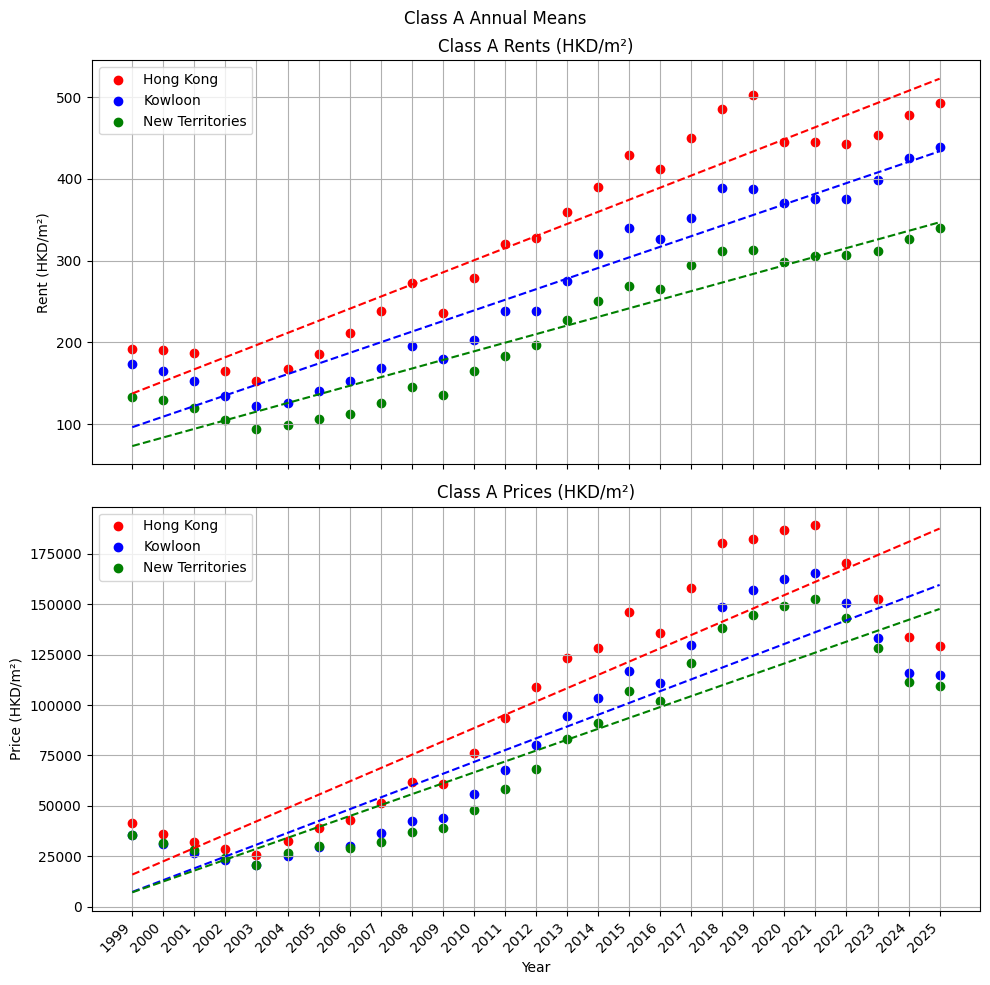

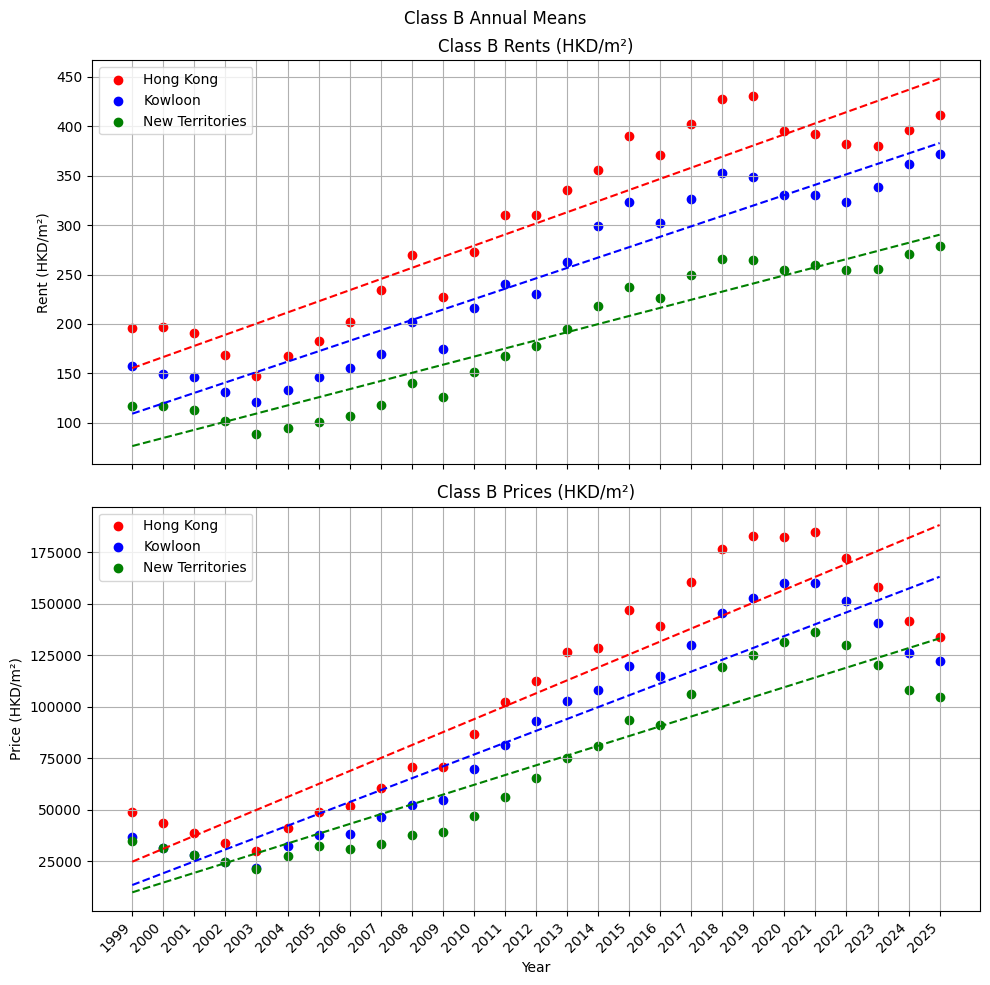

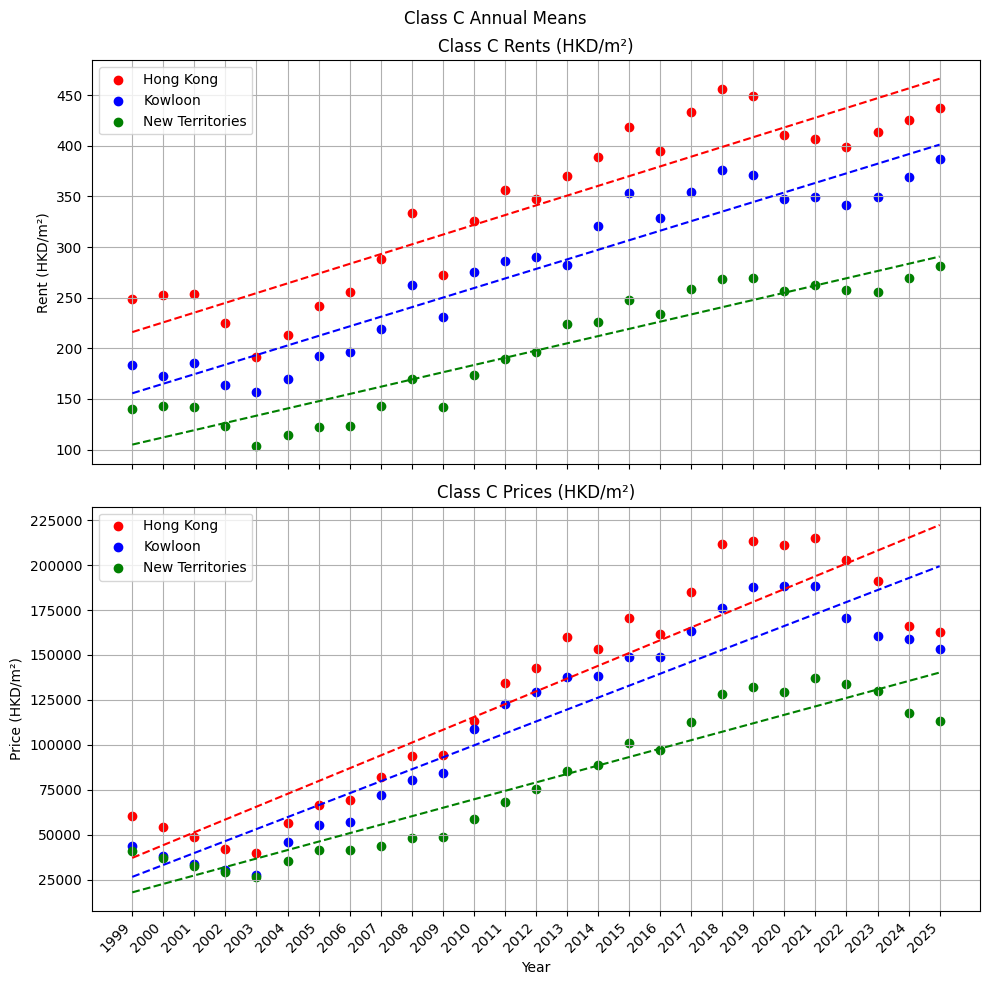

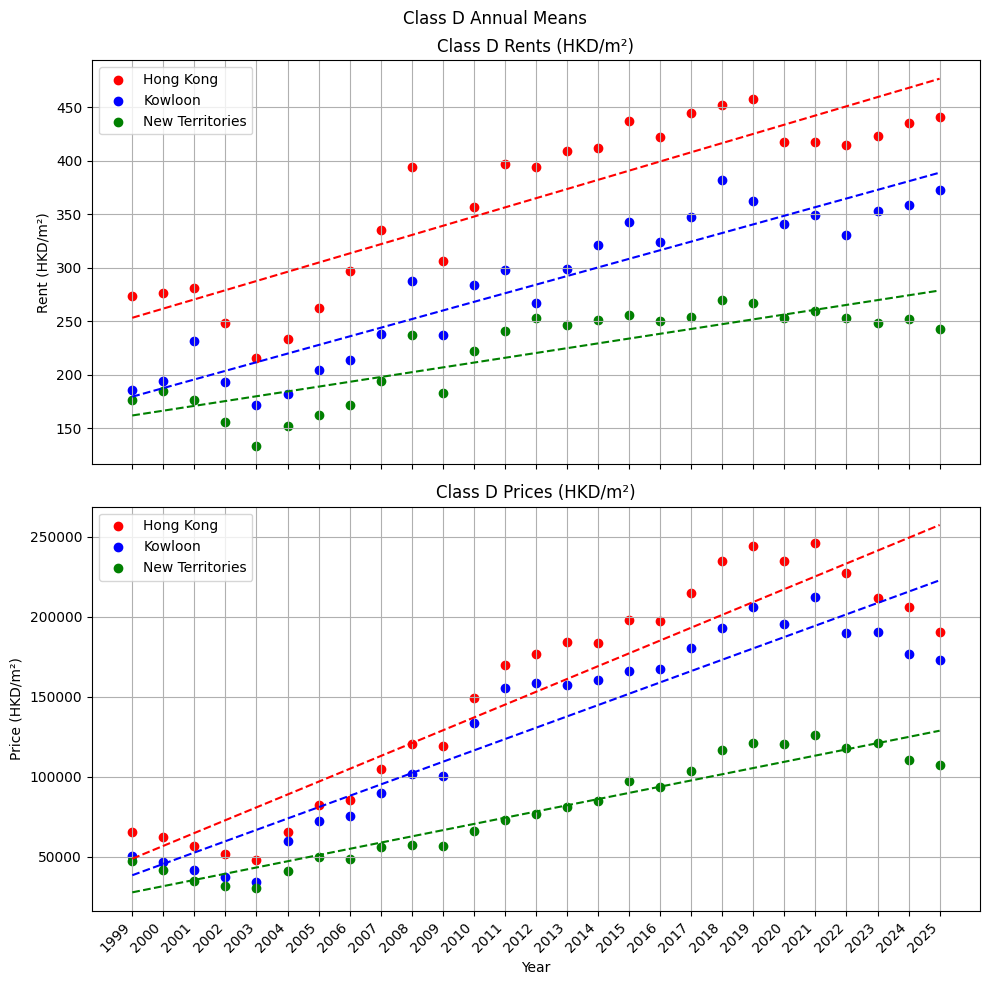

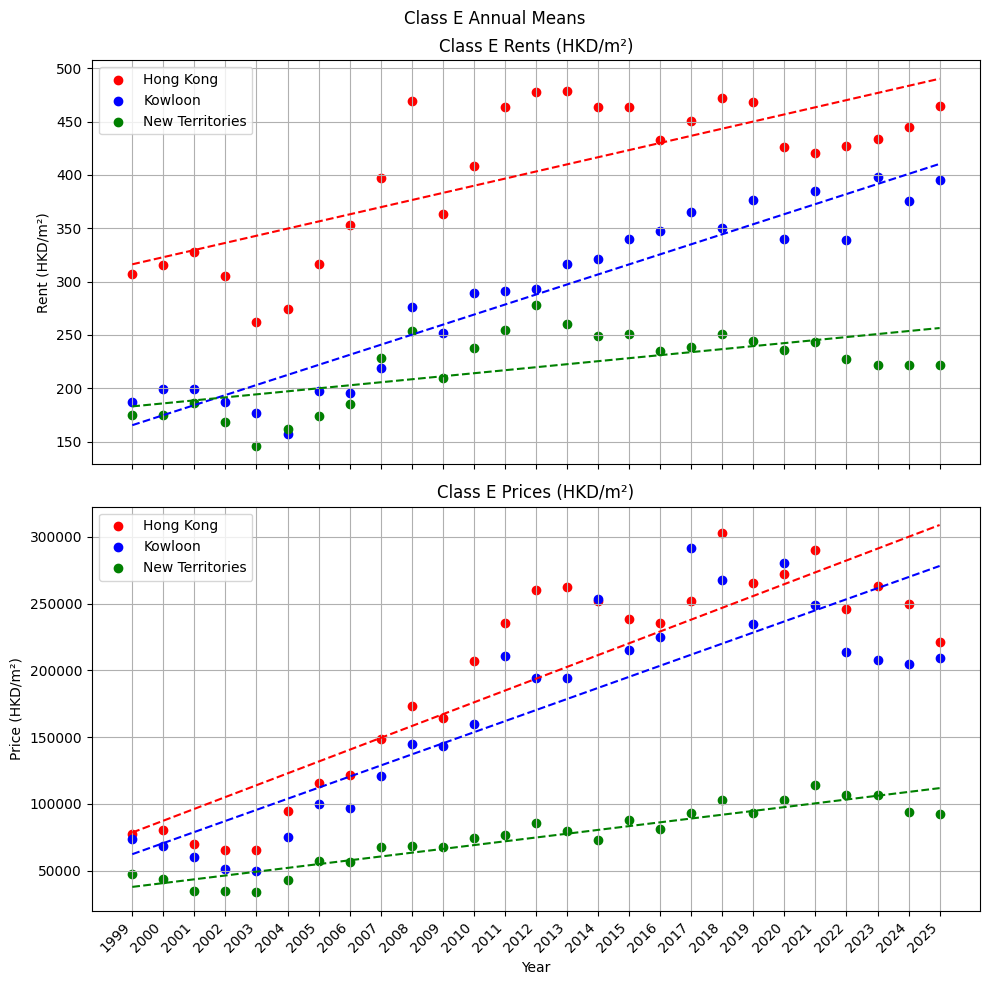

In [6]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

# 載入數據
def load_data(file):
    df = pd.read_csv(file, header=1)
    # 轉換 'Month' 為 datetime (格式如 'Jan-99')
    df['Month'] = pd.to_datetime(df['Month'], format='%b-%y')
    df['Year'] = df['Month'].dt.year
    return df

rent_df = load_data('rent.csv')
price_df = load_data('price.csv')

# 類別和區域
classes = ['A', 'B', 'C', 'D', 'E']
areas = ['Hong Kong', 'Kowloon', 'New Territories']
colors = {'Hong Kong': 'red', 'Kowloon': 'blue', 'New Territories': 'green'}

# 計算年度平均值
def get_annual_mean(df, cls, area):
    col = f'Class {cls} {area}'
    df[col] = pd.to_numeric(df[col], errors='coerce')
    annual = df.groupby('Year')[col].mean().reset_index()
    return annual['Year'].values, annual[col].values

# 繪製單個 subplot 的散點和回歸線
def plot_subplot(ax, years, means, area_color, label_prefix):
    mask = ~np.isnan(means)
    valid_years = years[mask]
    valid_means = means[mask]
    ax.scatter(valid_years, valid_means, color=area_color, label=f'{label_prefix}')
    
    if len(valid_means) > 1:
        x_num = np.arange(len(valid_years))  # 使用索引計算回歸
        result = linregress(x_num, valid_means)
        slope, intercept = result.slope, result.intercept
        reg_line = slope * x_num + intercept
        ax.plot(valid_years, reg_line, color=area_color, linestyle='--')

# 為每個類別生成一對圖 (2 rows, 1 column)
for cls in classes:
    fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
    fig.suptitle(f'Class {cls} Annual Means')
    
    # 上圖: Rent
    axs[0].set_title(f'Class {cls} Rents (HKD/m²)')
    axs[0].set_ylabel('Rent (HKD/m²)')
    for area in areas:
        years, means = get_annual_mean(rent_df, cls, area)
        plot_subplot(axs[0], years, means, colors[area], area)
    axs[0].legend()
    axs[0].grid(True)
    
    # 下圖: Price
    axs[1].set_title(f'Class {cls} Prices (HKD/m²)')
    axs[1].set_xlabel('Year')
    axs[1].set_ylabel('Price (HKD/m²)')
    for area in areas:
        years, means = get_annual_mean(price_df, cls, area)
        plot_subplot(axs[1], years, means, colors[area], area)
    axs[1].legend()
    axs[1].grid(True)
    
    # 明確設置 X 軸每個年份的標示單位
    all_years = sorted(rent_df['Year'].unique())
    axs[1].set_xticks(all_years)
    axs[1].set_xticklabels(all_years, rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import linregress

def load_data(file):
    df = pd.read_csv(file, header=1)
    df['Month'] = pd.to_datetime(df['Month'], format='%b-%y')
    df['Year'] = df['Month'].dt.year
    return df

rent_df = load_data('rent.csv')
price_df = load_data('price.csv')

classes = ['A', 'B', 'C', 'D', 'E']
areas = ['Hong Kong', 'Kowloon', 'New Territories']

def get_annual_mean(df, cls, area):
    col = f'Class {cls} {area}'
    df[col] = pd.to_numeric(df[col], errors='coerce')
    annual = df.groupby('Year')[col].mean().reset_index()
    return annual['Year'].values, annual[col].values

def get_slope(years, means):
    mask = ~np.isnan(means)
    valid_years = years[mask]
    valid_means = means[mask]
    if len(valid_means) > 1:
        x_num = np.arange(len(valid_years))
        result = linregress(x_num, valid_means)
        return result.slope
    return np.nan

results = []
for cls in classes:
    for data_type, df in [('Rent', rent_df), ('Price', price_df)]:
        row = {'Class': cls, 'Type': data_type}
        for area in areas:
            years, means = get_annual_mean(df, cls, area)
            row[f'{area} Slope'] = get_slope(years, means)
        results.append(row)

print(pd.DataFrame(results))

  Class   Type  Hong Kong Slope  Kowloon Slope  New Territories Slope
0     A   Rent        14.800528      12.973378              10.522098
1     A  Price      6602.268038    5857.830179            5407.206271
2     B   Rent        11.264518      10.533897               8.225904
3     B  Price      6286.277338    5755.579772            4742.314283
4     C   Rent         9.628367       9.448644               7.145174
5     C  Price      7118.992540    6643.883413            4700.677730
6     D   Rent         8.586409       8.046185               4.488391
7     D  Price      8030.085253    7097.281566            3889.407865
8     E   Rent         6.693626       9.423523               2.825859
9     E  Price      8851.029410    8295.490622            2842.888635


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import linregress

def load_data(file):
    df = pd.read_csv(file, header=1)
    df['Month'] = pd.to_datetime(df['Month'], format='%b-%y')
    df['Year'] = df['Month'].dt.year
    return df

rent_df = load_data('rent.csv')
price_df = load_data('price.csv')

classes = ['A', 'B', 'C', 'D', 'E']
areas = ['Hong Kong', 'Kowloon', 'New Territories']
data_types = {'Rent': rent_df, 'Price': price_df}

def get_annual_mean(df, cls, area):
    col = f'Class {cls} {area}'
    df[col] = pd.to_numeric(df[col], errors='coerce')
    annual = df.groupby('Year')[col].mean().reset_index()
    return annual['Year'].values, annual[col].values

for cls in classes:
    print(f"#### Class {cls}")
    print("| Data Type | Hong Kong | Kowloon | New Territories |")
    print("|-----------|-----------|---------|------------------|")
    for dtype, df in data_types.items():
        row = f"| {dtype:<9}"
        for area in areas:
            years, means = get_annual_mean(df, cls, area)
            mask = ~np.isnan(means)
            valid_years = years[mask]
            valid_means = means[mask]
            if len(valid_means) > 1:
                x_num = np.arange(len(valid_years))
                result = linregress(x_num, valid_means)
                r2 = result.rvalue ** 2
                row += f" | {r2:.4f}   "
            else:
                row += " | N/A      "
        print(row + "|")
    print()

#### Class A
| Data Type | Hong Kong | Kowloon | New Territories |
|-----------|-----------|---------|------------------|
| Rent      | 0.9092    | 0.9146    | 0.9051   |
| Price     | 0.8216    | 0.8287    | 0.8300   |

#### Class B
| Data Type | Hong Kong | Kowloon | New Territories |
|-----------|-----------|---------|------------------|
| Rent      | 0.8655    | 0.9106    | 0.9040   |
| Price     | 0.8428    | 0.8775    | 0.8670   |

#### Class C
| Data Type | Hong Kong | Kowloon | New Territories |
|-----------|-----------|---------|------------------|
| Rent      | 0.8363    | 0.9039    | 0.8767   |
| Price     | 0.8516    | 0.8802    | 0.8945   |

#### Class D
| Data Type | Hong Kong | Kowloon | New Territories |
|-----------|-----------|---------|------------------|
| Rent      | 0.7753    | 0.8694    | 0.7054   |
| Price     | 0.8639    | 0.8776    | 0.9104   |

#### Class E
| Data Type | Hong Kong | Kowloon | New Territories |
|-----------|-----------|---------|--------------

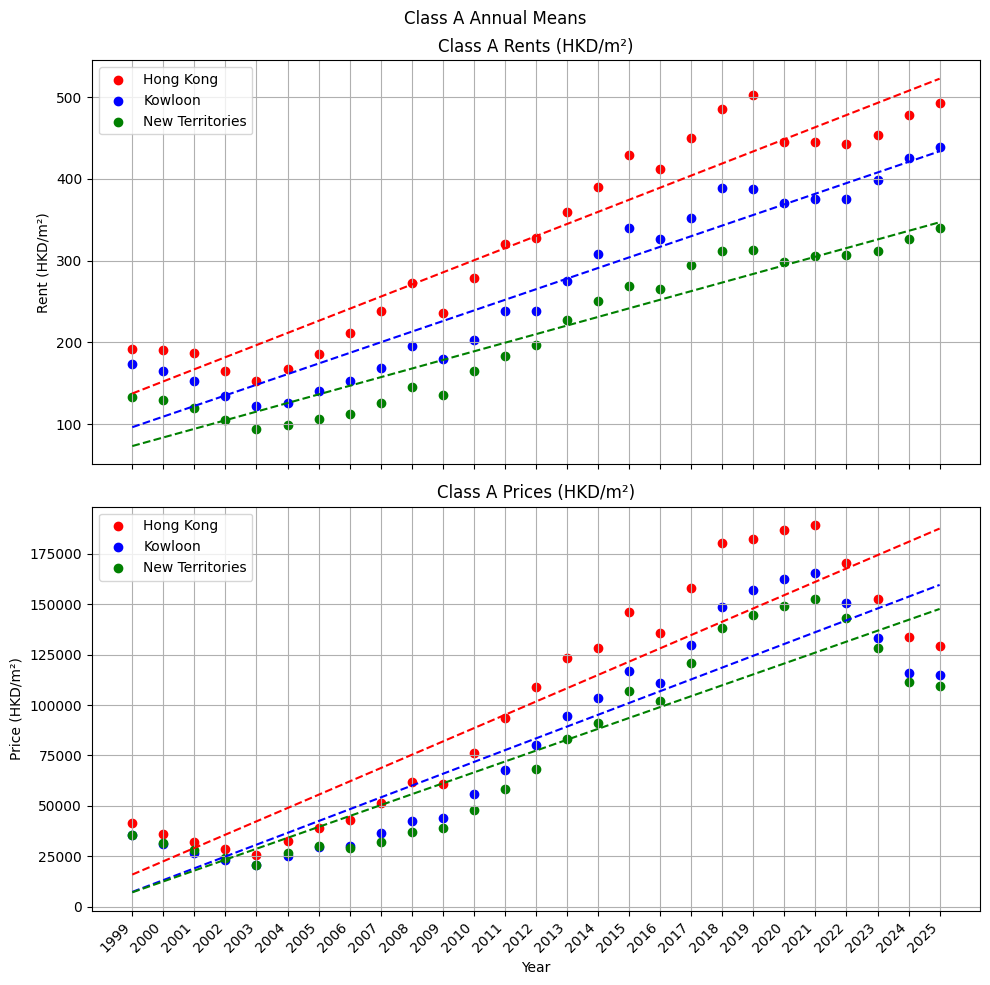

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

# 載入數據
def load_data(file):
    df = pd.read_csv(file, header=1)
    # 轉換 'Month' 為 datetime (格式如 'Jan-99')
    df['Month'] = pd.to_datetime(df['Month'], format='%b-%y')
    df['Year'] = df['Month'].dt.year
    return df

rent_df = load_data('rent.csv')
price_df = load_data('price.csv')

# 類別和區域
cls = 'A'
areas = ['Hong Kong', 'Kowloon', 'New Territories']
colors = {'Hong Kong': 'red', 'Kowloon': 'blue', 'New Territories': 'green'}

# 計算年度平均值
def get_annual_mean(df, cls, area):
    col = f'Class {cls} {area}'
    df[col] = pd.to_numeric(df[col], errors='coerce')
    annual = df.groupby('Year')[col].mean().reset_index()
    return annual['Year'].values, annual[col].values

# 繪製單個 subplot 的散點和回歸線
def plot_subplot(ax, years, means, area_color, label_prefix):
    mask = ~np.isnan(means)
    valid_years = years[mask]
    valid_means = means[mask]
    ax.scatter(valid_years, valid_means, color=area_color, label=f'{label_prefix}')
    
    if len(valid_means) > 1:
        x_num = np.arange(len(valid_years))  # 使用索引計算回歸
        result = linregress(x_num, valid_means)
        slope, intercept = result.slope, result.intercept
        reg_line = slope * x_num + intercept
        ax.plot(valid_years, reg_line, color=area_color, linestyle='--')

fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
fig.suptitle(f'Class {cls} Annual Means')
    
# 上圖: Rent
axs[0].set_title(f'Class {cls} Rents (HKD/m²)')
axs[0].set_ylabel('Rent (HKD/m²)')
for area in areas:
    years, means = get_annual_mean(rent_df, cls, area)
    plot_subplot(axs[0], years, means, colors[area], area)
axs[0].legend()
axs[0].grid(True)
    
# 下圖: Price
axs[1].set_title(f'Class {cls} Prices (HKD/m²)')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Price (HKD/m²)')
for area in areas:
    years, means = get_annual_mean(price_df, cls, area)
    plot_subplot(axs[1], years, means, colors[area], area)
axs[1].legend()
axs[1].grid(True)
    
# 明確設置 X 軸每個年份的標示單位
all_years = sorted(rent_df['Year'].unique())
axs[1].set_xticks(all_years)
axs[1].set_xticklabels(all_years, rotation=45, ha='right')
    
plt.tight_layout()
plt.show()

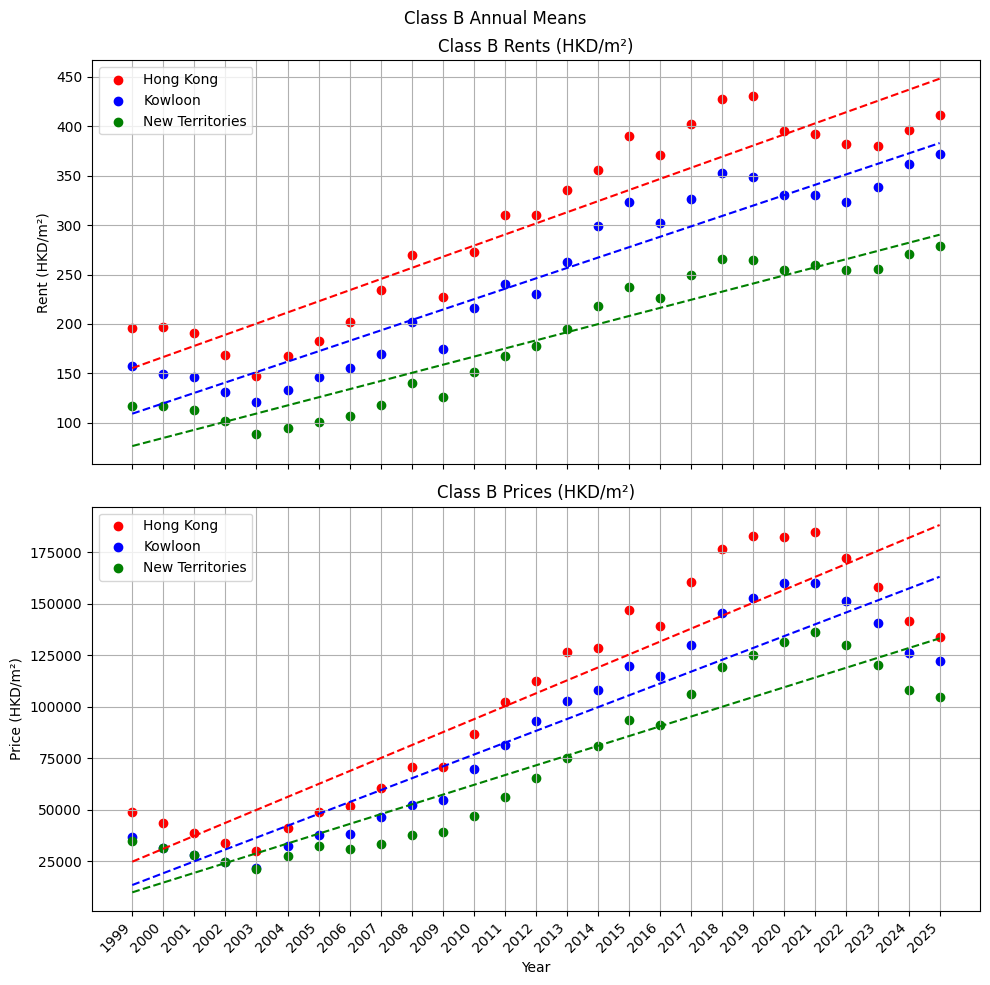

In [8]:
def load_data(file):
    df = pd.read_csv(file, header=1)
    # 轉換 'Month' 為 datetime (格式如 'Jan-99')
    df['Month'] = pd.to_datetime(df['Month'], format='%b-%y')
    df['Year'] = df['Month'].dt.year
    return df

rent_df = load_data('rent.csv')
price_df = load_data('price.csv')

# 類別和區域
cls = 'B'
areas = ['Hong Kong', 'Kowloon', 'New Territories']
colors = {'Hong Kong': 'red', 'Kowloon': 'blue', 'New Territories': 'green'}

# 計算年度平均值
def get_annual_mean(df, cls, area):
    col = f'Class {cls} {area}'
    df[col] = pd.to_numeric(df[col], errors='coerce')
    annual = df.groupby('Year')[col].mean().reset_index()
    return annual['Year'].values, annual[col].values

# 繪製單個 subplot 的散點和回歸線
def plot_subplot(ax, years, means, area_color, label_prefix):
    mask = ~np.isnan(means)
    valid_years = years[mask]
    valid_means = means[mask]
    ax.scatter(valid_years, valid_means, color=area_color, label=f'{label_prefix}')
    
    if len(valid_means) > 1:
        x_num = np.arange(len(valid_years))  # 使用索引計算回歸
        result = linregress(x_num, valid_means)
        slope, intercept = result.slope, result.intercept
        reg_line = slope * x_num + intercept
        ax.plot(valid_years, reg_line, color=area_color, linestyle='--')

fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
fig.suptitle(f'Class {cls} Annual Means')
    
# 上圖: Rent
axs[0].set_title(f'Class {cls} Rents (HKD/m²)')
axs[0].set_ylabel('Rent (HKD/m²)')
for area in areas:
    years, means = get_annual_mean(rent_df, cls, area)
    plot_subplot(axs[0], years, means, colors[area], area)
axs[0].legend()
axs[0].grid(True)
    
# 下圖: Price
axs[1].set_title(f'Class {cls} Prices (HKD/m²)')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Price (HKD/m²)')
for area in areas:
    years, means = get_annual_mean(price_df, cls, area)
    plot_subplot(axs[1], years, means, colors[area], area)
axs[1].legend()
axs[1].grid(True)
    
# 明確設置 X 軸每個年份的標示單位
all_years = sorted(rent_df['Year'].unique())
axs[1].set_xticks(all_years)
axs[1].set_xticklabels(all_years, rotation=45, ha='right')
    
plt.tight_layout()
plt.show()

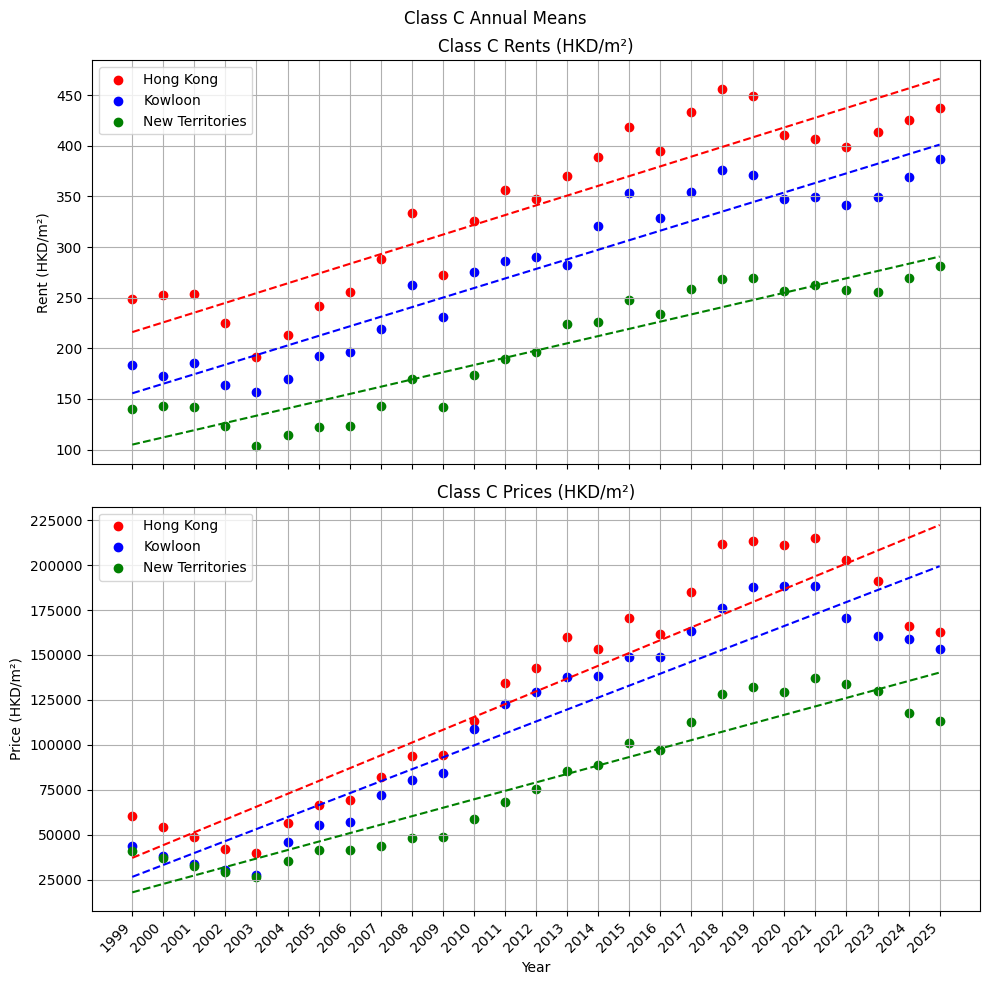

In [9]:
def load_data(file):
    df = pd.read_csv(file, header=1)
    # 轉換 'Month' 為 datetime (格式如 'Jan-99')
    df['Month'] = pd.to_datetime(df['Month'], format='%b-%y')
    df['Year'] = df['Month'].dt.year
    return df

rent_df = load_data('rent.csv')
price_df = load_data('price.csv')

# 類別和區域
cls = 'C'
areas = ['Hong Kong', 'Kowloon', 'New Territories']
colors = {'Hong Kong': 'red', 'Kowloon': 'blue', 'New Territories': 'green'}

# 計算年度平均值
def get_annual_mean(df, cls, area):
    col = f'Class {cls} {area}'
    df[col] = pd.to_numeric(df[col], errors='coerce')
    annual = df.groupby('Year')[col].mean().reset_index()
    return annual['Year'].values, annual[col].values

# 繪製單個 subplot 的散點和回歸線
def plot_subplot(ax, years, means, area_color, label_prefix):
    mask = ~np.isnan(means)
    valid_years = years[mask]
    valid_means = means[mask]
    ax.scatter(valid_years, valid_means, color=area_color, label=f'{label_prefix}')
    
    if len(valid_means) > 1:
        x_num = np.arange(len(valid_years))  # 使用索引計算回歸
        result = linregress(x_num, valid_means)
        slope, intercept = result.slope, result.intercept
        reg_line = slope * x_num + intercept
        ax.plot(valid_years, reg_line, color=area_color, linestyle='--')

fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
fig.suptitle(f'Class {cls} Annual Means')
    
# 上圖: Rent
axs[0].set_title(f'Class {cls} Rents (HKD/m²)')
axs[0].set_ylabel('Rent (HKD/m²)')
for area in areas:
    years, means = get_annual_mean(rent_df, cls, area)
    plot_subplot(axs[0], years, means, colors[area], area)
axs[0].legend()
axs[0].grid(True)
    
# 下圖: Price
axs[1].set_title(f'Class {cls} Prices (HKD/m²)')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Price (HKD/m²)')
for area in areas:
    years, means = get_annual_mean(price_df, cls, area)
    plot_subplot(axs[1], years, means, colors[area], area)
axs[1].legend()
axs[1].grid(True)
    
# 明確設置 X 軸每個年份的標示單位
all_years = sorted(rent_df['Year'].unique())
axs[1].set_xticks(all_years)
axs[1].set_xticklabels(all_years, rotation=45, ha='right')
    
plt.tight_layout()
plt.show()

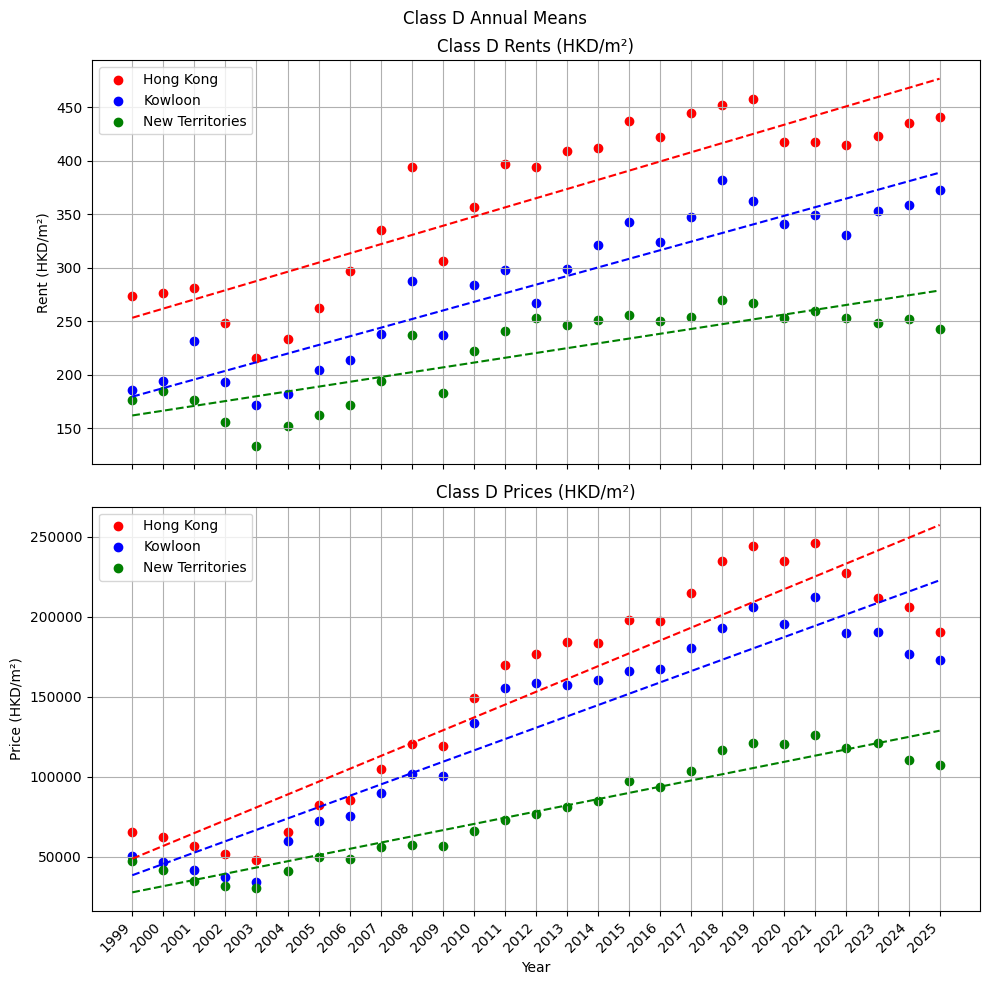

In [10]:
def load_data(file):
    df = pd.read_csv(file, header=1)
    # 轉換 'Month' 為 datetime (格式如 'Jan-99')
    df['Month'] = pd.to_datetime(df['Month'], format='%b-%y')
    df['Year'] = df['Month'].dt.year
    return df

rent_df = load_data('rent.csv')
price_df = load_data('price.csv')

# 類別和區域
cls = 'D'
areas = ['Hong Kong', 'Kowloon', 'New Territories']
colors = {'Hong Kong': 'red', 'Kowloon': 'blue', 'New Territories': 'green'}

# 計算年度平均值
def get_annual_mean(df, cls, area):
    col = f'Class {cls} {area}'
    df[col] = pd.to_numeric(df[col], errors='coerce')
    annual = df.groupby('Year')[col].mean().reset_index()
    return annual['Year'].values, annual[col].values

# 繪製單個 subplot 的散點和回歸線
def plot_subplot(ax, years, means, area_color, label_prefix):
    mask = ~np.isnan(means)
    valid_years = years[mask]
    valid_means = means[mask]
    ax.scatter(valid_years, valid_means, color=area_color, label=f'{label_prefix}')
    
    if len(valid_means) > 1:
        x_num = np.arange(len(valid_years))  # 使用索引計算回歸
        result = linregress(x_num, valid_means)
        slope, intercept = result.slope, result.intercept
        reg_line = slope * x_num + intercept
        ax.plot(valid_years, reg_line, color=area_color, linestyle='--')

fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
fig.suptitle(f'Class {cls} Annual Means')
    
# 上圖: Rent
axs[0].set_title(f'Class {cls} Rents (HKD/m²)')
axs[0].set_ylabel('Rent (HKD/m²)')
for area in areas:
    years, means = get_annual_mean(rent_df, cls, area)
    plot_subplot(axs[0], years, means, colors[area], area)
axs[0].legend()
axs[0].grid(True)
    
# 下圖: Price
axs[1].set_title(f'Class {cls} Prices (HKD/m²)')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Price (HKD/m²)')
for area in areas:
    years, means = get_annual_mean(price_df, cls, area)
    plot_subplot(axs[1], years, means, colors[area], area)
axs[1].legend()
axs[1].grid(True)
    
# 明確設置 X 軸每個年份的標示單位
all_years = sorted(rent_df['Year'].unique())
axs[1].set_xticks(all_years)
axs[1].set_xticklabels(all_years, rotation=45, ha='right')
    
plt.tight_layout()
plt.show()

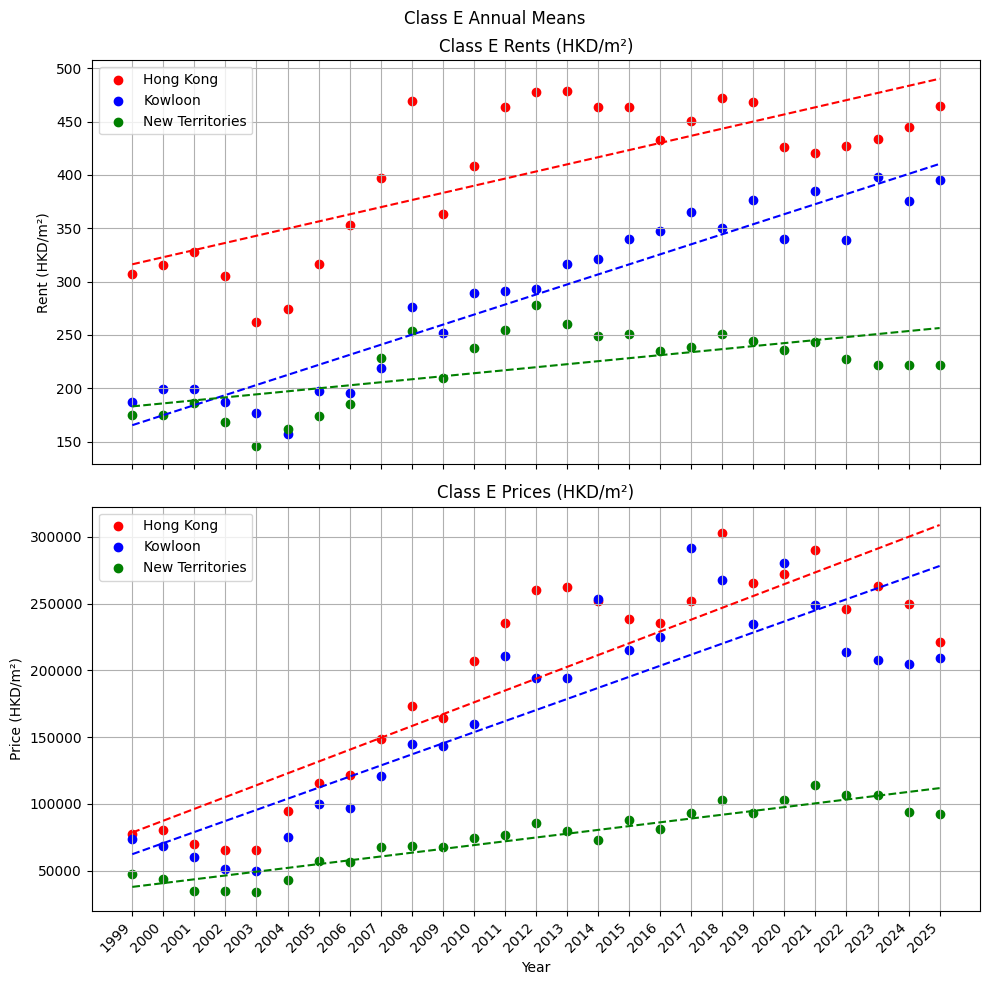

In [11]:
def load_data(file):
    df = pd.read_csv(file, header=1)
    # 轉換 'Month' 為 datetime (格式如 'Jan-99')
    df['Month'] = pd.to_datetime(df['Month'], format='%b-%y')
    df['Year'] = df['Month'].dt.year
    return df

rent_df = load_data('rent.csv')
price_df = load_data('price.csv')

# 類別和區域
cls = 'E'
areas = ['Hong Kong', 'Kowloon', 'New Territories']
colors = {'Hong Kong': 'red', 'Kowloon': 'blue', 'New Territories': 'green'}

# 計算年度平均值
def get_annual_mean(df, cls, area):
    col = f'Class {cls} {area}'
    df[col] = pd.to_numeric(df[col], errors='coerce')
    annual = df.groupby('Year')[col].mean().reset_index()
    return annual['Year'].values, annual[col].values

# 繪製單個 subplot 的散點和回歸線
def plot_subplot(ax, years, means, area_color, label_prefix):
    mask = ~np.isnan(means)
    valid_years = years[mask]
    valid_means = means[mask]
    ax.scatter(valid_years, valid_means, color=area_color, label=f'{label_prefix}')
    
    if len(valid_means) > 1:
        x_num = np.arange(len(valid_years))  # 使用索引計算回歸
        result = linregress(x_num, valid_means)
        slope, intercept = result.slope, result.intercept
        reg_line = slope * x_num + intercept
        ax.plot(valid_years, reg_line, color=area_color, linestyle='--')

fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
fig.suptitle(f'Class {cls} Annual Means')
    
# 上圖: Rent
axs[0].set_title(f'Class {cls} Rents (HKD/m²)')
axs[0].set_ylabel('Rent (HKD/m²)')
for area in areas:
    years, means = get_annual_mean(rent_df, cls, area)
    plot_subplot(axs[0], years, means, colors[area], area)
axs[0].legend()
axs[0].grid(True)
    
# 下圖: Price
axs[1].set_title(f'Class {cls} Prices (HKD/m²)')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Price (HKD/m²)')
for area in areas:
    years, means = get_annual_mean(price_df, cls, area)
    plot_subplot(axs[1], years, means, colors[area], area)
axs[1].legend()
axs[1].grid(True)
    
# 明確設置 X 軸每個年份的標示單位
all_years = sorted(rent_df['Year'].unique())
axs[1].set_xticks(all_years)
axs[1].set_xticklabels(all_years, rotation=45, ha='right')
    
plt.tight_layout()
plt.show()

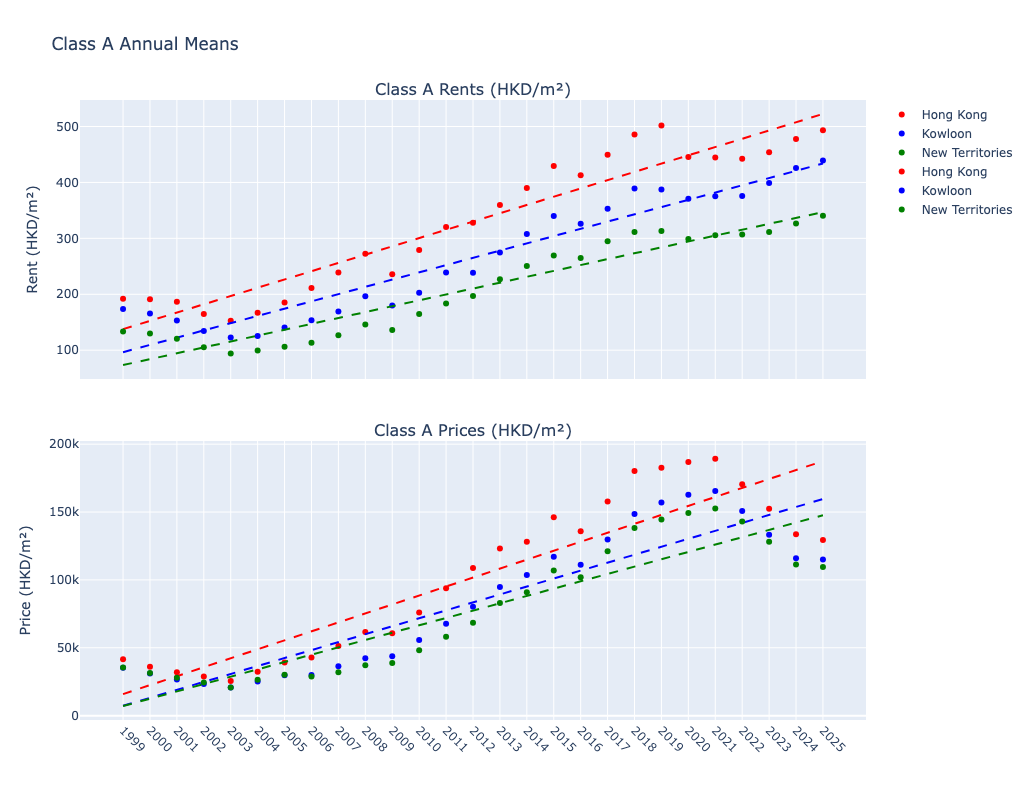

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def load_data(file):
    df = pd.read_csv(file, header=1)
    df['Month'] = pd.to_datetime(df['Month'], format='%b-%y')
    df['Year'] = df['Month'].dt.year
    return df

rent_df = load_data('rent.csv')
price_df = load_data('price.csv')

# 類別和區域
cls = 'A'
areas = ['Hong Kong', 'Kowloon', 'New Territories']
colors = {'Hong Kong': 'red', 'Kowloon': 'blue', 'New Territories': 'green'}

# 計算年度平均值
def get_annual_mean(df, cls, area):
    col = f'Class {cls} {area}'
    df[col] = pd.to_numeric(df[col], errors='coerce')
    annual = df.groupby('Year')[col].mean().reset_index()
    return annual['Year'].values, annual[col].values

# 創建圖表
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1,
                    subplot_titles=(f'Class {cls} Rents (HKD/m²)', f'Class {cls} Prices (HKD/m²)'))

for i, df in enumerate([rent_df, price_df]):
    for area in areas:
        years, means = get_annual_mean(df, cls, area)
        mask = ~np.isnan(means)
        valid_years, valid_means = years[mask], means[mask]
        
        fig.add_trace(go.Scatter(x=valid_years, y=valid_means, mode='markers',
                                 marker=dict(color=colors[area]), name=area,
                                 hovertemplate='Year: %{x}<br>Value: %{y:.2f}'),
                      row=i+1, col=1)
        
        if len(valid_means) > 1:
            result = linregress(np.arange(len(valid_years)), valid_means)
            reg_line = result.slope * np.arange(len(valid_years)) + result.intercept
            fig.add_trace(go.Scatter(x=valid_years, y=reg_line, mode='lines',
                                     line=dict(color=colors[area], dash='dash'),
                                     showlegend=False,
                                     hovertemplate='Year: %{x}<br>Value: %{y:.2f}'),
                          row=i+1, col=1)

# 統一刻度（每年顯示一次）
fig.update_xaxes(tickmode='array', tickvals=sorted(rent_df['Year'].unique()), tickangle=45, row=2, col=1)
fig.update_xaxes(tickmode='array', tickvals=sorted(rent_df['Year'].unique()), row=1, col=1)

fig.update_layout(title_text=f'Class {cls} Annual Means', height=800, width=1000)
fig.update_yaxes(title_text='Rent (HKD/m²)', row=1, col=1)
fig.update_yaxes(title_text='Price (HKD/m²)', row=2, col=1)

fig.show()

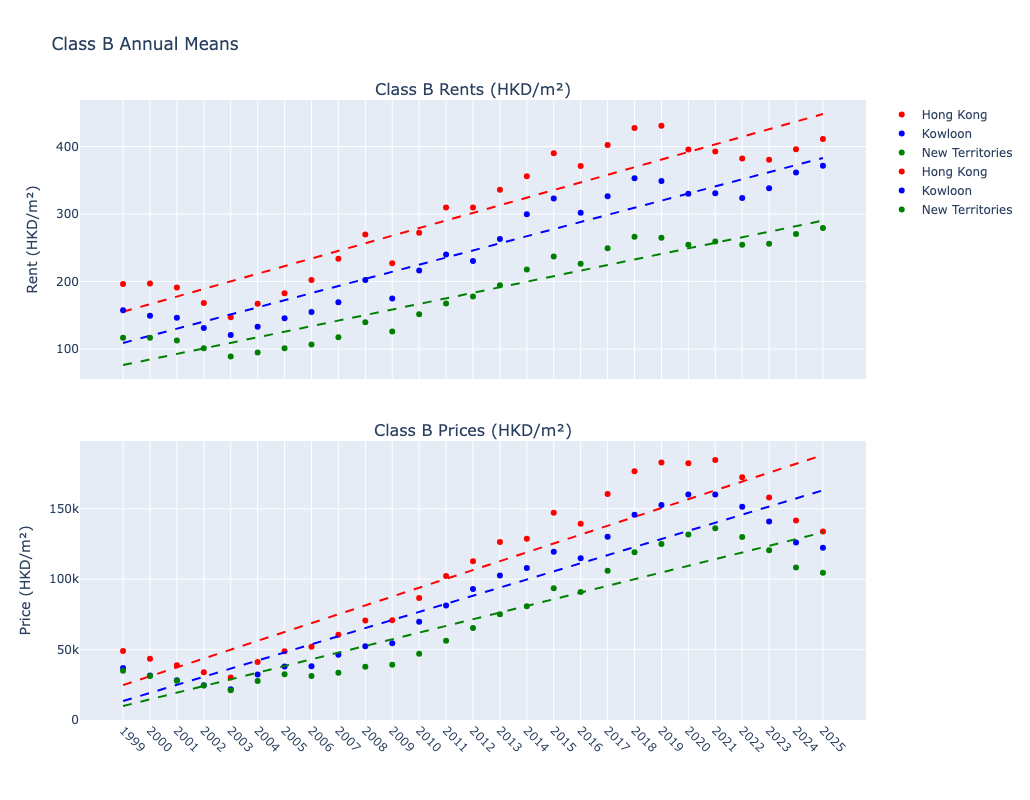

In [2]:
# 類別和區域
cls = 'B'
areas = ['Hong Kong', 'Kowloon', 'New Territories']
colors = {'Hong Kong': 'red', 'Kowloon': 'blue', 'New Territories': 'green'}

# 計算年度平均值
def get_annual_mean(df, cls, area):
    col = f'Class {cls} {area}'
    df[col] = pd.to_numeric(df[col], errors='coerce')
    annual = df.groupby('Year')[col].mean().reset_index()
    return annual['Year'].values, annual[col].values

# 創建圖表
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1,
                    subplot_titles=(f'Class {cls} Rents (HKD/m²)', f'Class {cls} Prices (HKD/m²)'))

for i, df in enumerate([rent_df, price_df]):
    for area in areas:
        years, means = get_annual_mean(df, cls, area)
        mask = ~np.isnan(means)
        valid_years, valid_means = years[mask], means[mask]
        
        fig.add_trace(go.Scatter(x=valid_years, y=valid_means, mode='markers',
                                 marker=dict(color=colors[area]), name=area,
                                 hovertemplate='Year: %{x}<br>Value: %{y:.2f}'),
                      row=i+1, col=1)
        
        if len(valid_means) > 1:
            result = linregress(np.arange(len(valid_years)), valid_means)
            reg_line = result.slope * np.arange(len(valid_years)) + result.intercept
            fig.add_trace(go.Scatter(x=valid_years, y=reg_line, mode='lines',
                                     line=dict(color=colors[area], dash='dash'),
                                     showlegend=False,
                                     hovertemplate='Year: %{x}<br>Value: %{y:.2f}'),
                          row=i+1, col=1)

# 統一刻度（每年顯示一次）
fig.update_xaxes(tickmode='array', tickvals=sorted(rent_df['Year'].unique()), tickangle=45, row=2, col=1)
fig.update_xaxes(tickmode='array', tickvals=sorted(rent_df['Year'].unique()), row=1, col=1)

fig.update_layout(title_text=f'Class {cls} Annual Means', height=800, width=1000)
fig.update_yaxes(title_text='Rent (HKD/m²)', row=1, col=1)
fig.update_yaxes(title_text='Price (HKD/m²)', row=2, col=1)

fig.show()

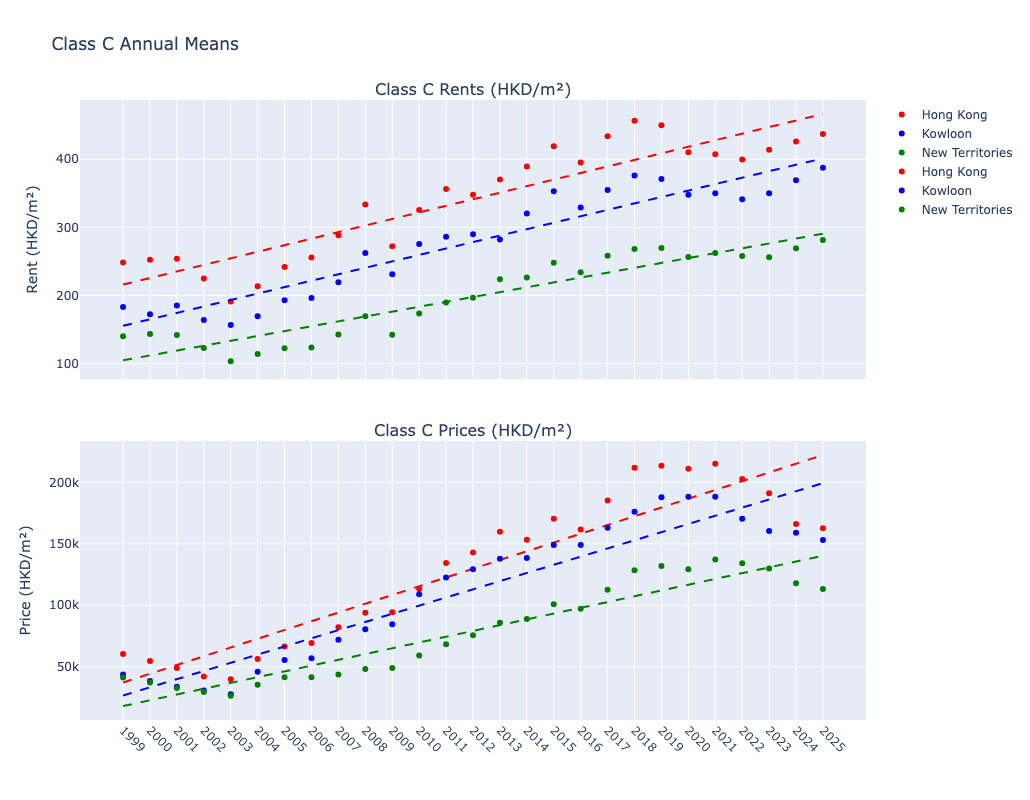

In [3]:
# 類別和區域
cls = 'C'
areas = ['Hong Kong', 'Kowloon', 'New Territories']
colors = {'Hong Kong': 'red', 'Kowloon': 'blue', 'New Territories': 'green'}

# 計算年度平均值
def get_annual_mean(df, cls, area):
    col = f'Class {cls} {area}'
    df[col] = pd.to_numeric(df[col], errors='coerce')
    annual = df.groupby('Year')[col].mean().reset_index()
    return annual['Year'].values, annual[col].values

# 創建圖表
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1,
                    subplot_titles=(f'Class {cls} Rents (HKD/m²)', f'Class {cls} Prices (HKD/m²)'))

for i, df in enumerate([rent_df, price_df]):
    for area in areas:
        years, means = get_annual_mean(df, cls, area)
        mask = ~np.isnan(means)
        valid_years, valid_means = years[mask], means[mask]
        
        fig.add_trace(go.Scatter(x=valid_years, y=valid_means, mode='markers',
                                 marker=dict(color=colors[area]), name=area,
                                 hovertemplate='Year: %{x}<br>Value: %{y:.2f}'),
                      row=i+1, col=1)
        
        if len(valid_means) > 1:
            result = linregress(np.arange(len(valid_years)), valid_means)
            reg_line = result.slope * np.arange(len(valid_years)) + result.intercept
            fig.add_trace(go.Scatter(x=valid_years, y=reg_line, mode='lines',
                                     line=dict(color=colors[area], dash='dash'),
                                     showlegend=False,
                                     hovertemplate='Year: %{x}<br>Value: %{y:.2f}'),
                          row=i+1, col=1)

# 統一刻度（每年顯示一次）
fig.update_xaxes(tickmode='array', tickvals=sorted(rent_df['Year'].unique()), tickangle=45, row=2, col=1)
fig.update_xaxes(tickmode='array', tickvals=sorted(rent_df['Year'].unique()), row=1, col=1)

fig.update_layout(title_text=f'Class {cls} Annual Means', height=800, width=1000)
fig.update_yaxes(title_text='Rent (HKD/m²)', row=1, col=1)
fig.update_yaxes(title_text='Price (HKD/m²)', row=2, col=1)

fig.show()

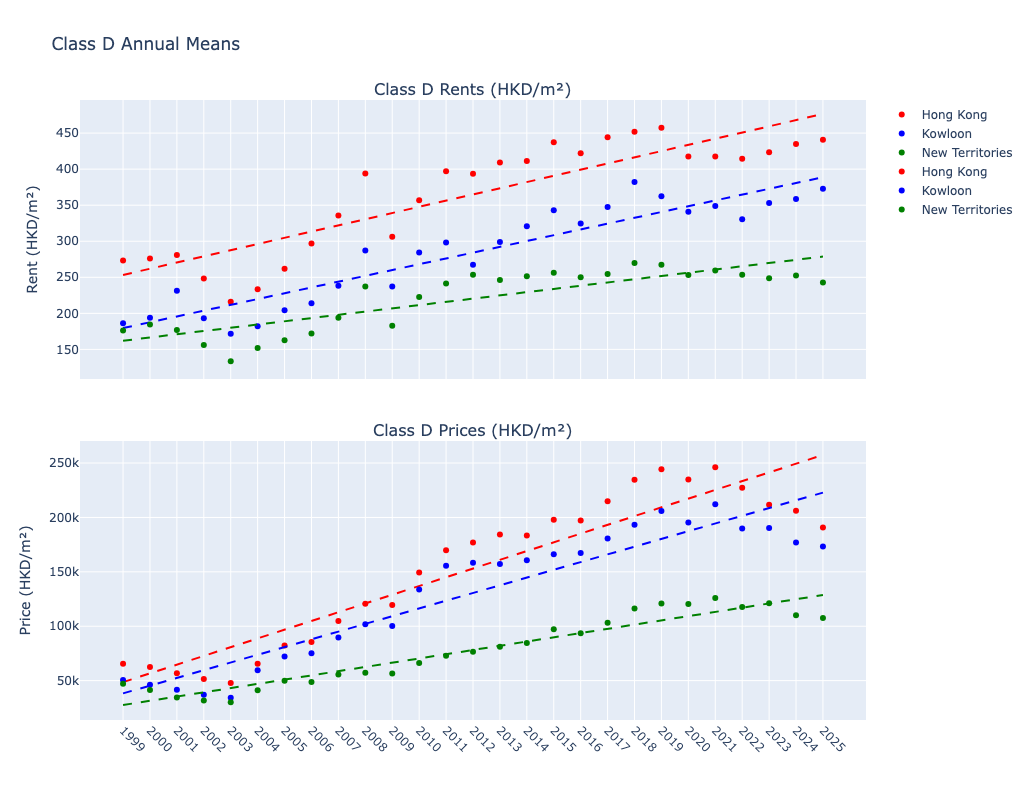

In [4]:
# 類別和區域
cls = 'D'
areas = ['Hong Kong', 'Kowloon', 'New Territories']
colors = {'Hong Kong': 'red', 'Kowloon': 'blue', 'New Territories': 'green'}

# 計算年度平均值
def get_annual_mean(df, cls, area):
    col = f'Class {cls} {area}'
    df[col] = pd.to_numeric(df[col], errors='coerce')
    annual = df.groupby('Year')[col].mean().reset_index()
    return annual['Year'].values, annual[col].values

# 創建圖表
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1,
                    subplot_titles=(f'Class {cls} Rents (HKD/m²)', f'Class {cls} Prices (HKD/m²)'))

for i, df in enumerate([rent_df, price_df]):
    for area in areas:
        years, means = get_annual_mean(df, cls, area)
        mask = ~np.isnan(means)
        valid_years, valid_means = years[mask], means[mask]
        
        fig.add_trace(go.Scatter(x=valid_years, y=valid_means, mode='markers',
                                 marker=dict(color=colors[area]), name=area,
                                 hovertemplate='Year: %{x}<br>Value: %{y:.2f}'),
                      row=i+1, col=1)
        
        if len(valid_means) > 1:
            result = linregress(np.arange(len(valid_years)), valid_means)
            reg_line = result.slope * np.arange(len(valid_years)) + result.intercept
            fig.add_trace(go.Scatter(x=valid_years, y=reg_line, mode='lines',
                                     line=dict(color=colors[area], dash='dash'),
                                     showlegend=False,
                                     hovertemplate='Year: %{x}<br>Value: %{y:.2f}'),
                          row=i+1, col=1)

# 統一刻度（每年顯示一次）
fig.update_xaxes(tickmode='array', tickvals=sorted(rent_df['Year'].unique()), tickangle=45, row=2, col=1)
fig.update_xaxes(tickmode='array', tickvals=sorted(rent_df['Year'].unique()), row=1, col=1)

fig.update_layout(title_text=f'Class {cls} Annual Means', height=800, width=1000)
fig.update_yaxes(title_text='Rent (HKD/m²)', row=1, col=1)
fig.update_yaxes(title_text='Price (HKD/m²)', row=2, col=1)

fig.show()

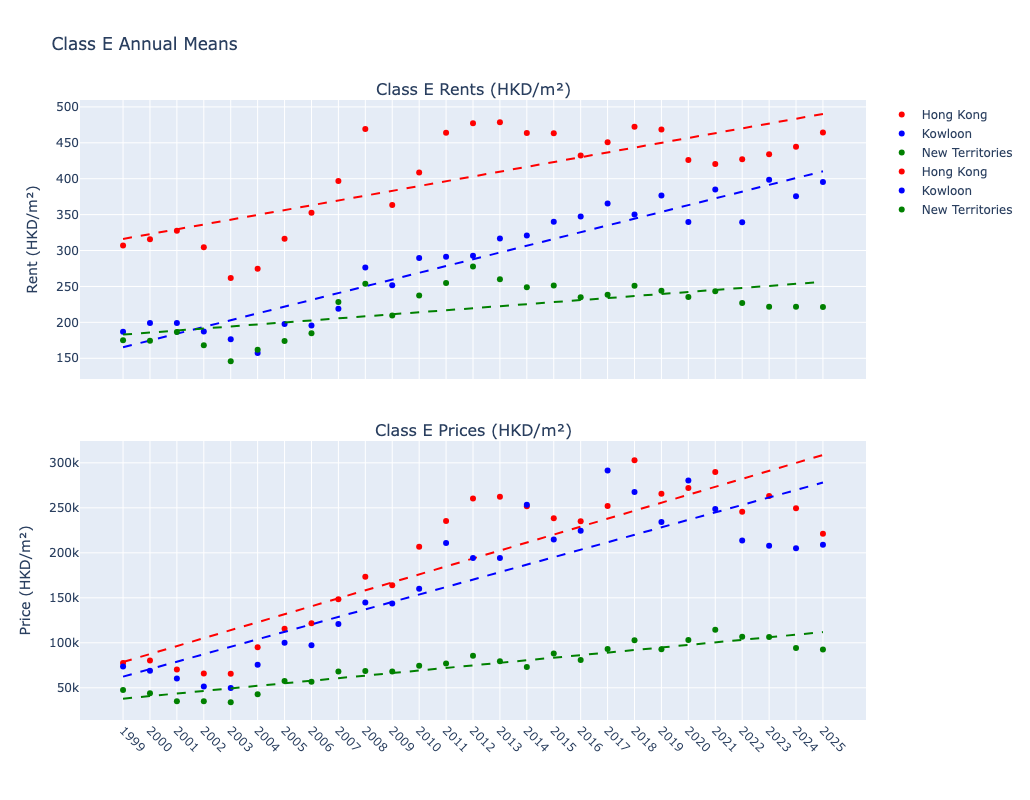

In [5]:
# 類別和區域
cls = 'E'
areas = ['Hong Kong', 'Kowloon', 'New Territories']
colors = {'Hong Kong': 'red', 'Kowloon': 'blue', 'New Territories': 'green'}

# 計算年度平均值
def get_annual_mean(df, cls, area):
    col = f'Class {cls} {area}'
    df[col] = pd.to_numeric(df[col], errors='coerce')
    annual = df.groupby('Year')[col].mean().reset_index()
    return annual['Year'].values, annual[col].values

# 創建圖表
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1,
                    subplot_titles=(f'Class {cls} Rents (HKD/m²)', f'Class {cls} Prices (HKD/m²)'))

for i, df in enumerate([rent_df, price_df]):
    for area in areas:
        years, means = get_annual_mean(df, cls, area)
        mask = ~np.isnan(means)
        valid_years, valid_means = years[mask], means[mask]
        
        fig.add_trace(go.Scatter(x=valid_years, y=valid_means, mode='markers',
                                 marker=dict(color=colors[area]), name=area,
                                 hovertemplate='Year: %{x}<br>Value: %{y:.2f}'),
                      row=i+1, col=1)
        
        if len(valid_means) > 1:
            result = linregress(np.arange(len(valid_years)), valid_means)
            reg_line = result.slope * np.arange(len(valid_years)) + result.intercept
            fig.add_trace(go.Scatter(x=valid_years, y=reg_line, mode='lines',
                                     line=dict(color=colors[area], dash='dash'),
                                     showlegend=False,
                                     hovertemplate='Year: %{x}<br>Value: %{y:.2f}'),
                          row=i+1, col=1)

# 統一刻度（每年顯示一次）
fig.update_xaxes(tickmode='array', tickvals=sorted(rent_df['Year'].unique()), tickangle=45, row=2, col=1)
fig.update_xaxes(tickmode='array', tickvals=sorted(rent_df['Year'].unique()), row=1, col=1)

fig.update_layout(title_text=f'Class {cls} Annual Means', height=800, width=1000)
fig.update_yaxes(title_text='Rent (HKD/m²)', row=1, col=1)
fig.update_yaxes(title_text='Price (HKD/m²)', row=2, col=1)

fig.show()